# Imports

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [73]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

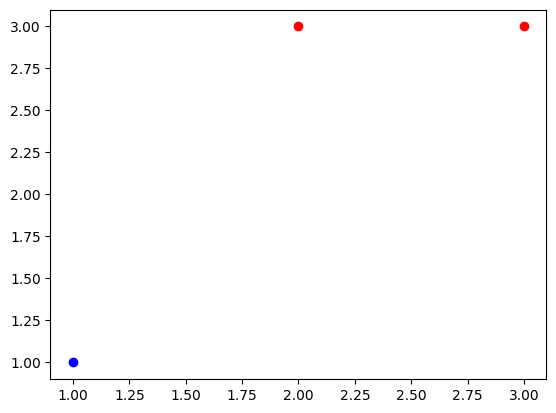

<Figure size 640x480 with 0 Axes>

In [74]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [75]:
import projetannuel

In [76]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1)

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Ici ça passe
Accuracy Score : 1.0


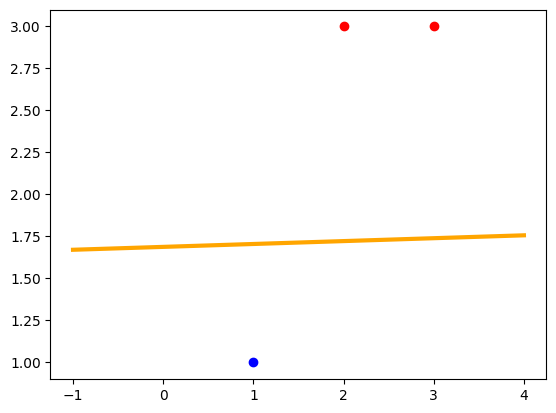

<Figure size 640x480 with 0 Axes>

In [77]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')

x1 = np.linspace(-1, 4, 100)
x2 = ( - model.weights[0] * x1 - model.weights[2]) / model.weights[1]

plt.plot(x1, x2, c='orange', lw=3)
plt.show()
plt.clf()

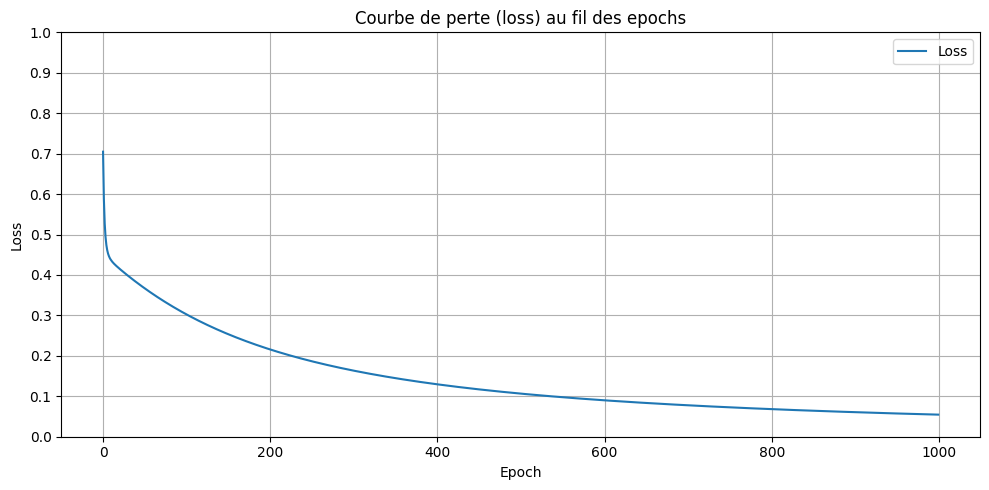

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [79]:
import projetannuel as pa

Y = Y.reshape(-1, 1)
print(Y)

model = pa.MLP([2,1])
model.train(X,Y,1000000,0.01,True)

Y_pred = [model.predict(x,True) for x in X]
print(Y_pred)

[[ 1]
 [-1]
 [-1]]
[[0.9884275486533337], [-0.9939112621395174], [-0.9954820220471955]]


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [80]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

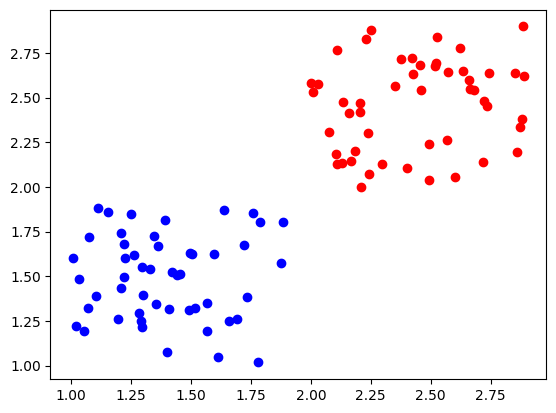

<Figure size 640x480 with 0 Axes>

In [81]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [82]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1)

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Ici ça passe
Accuracy Score : 0.99


C:\Users\leopo\AppData\Local\Temp\ipykernel_46400\1085004695.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = projetannuel.float_labels(Y)
C:\Users\leopo\AppData\Local\Temp\ipykernel_46400\1085004695.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


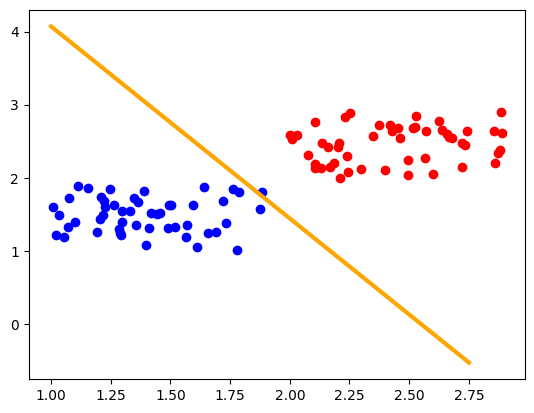

<Figure size 640x480 with 0 Axes>

In [83]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')

x1 = np.linspace(1, 2.75, 100)
x2 = ( - model.weights[0] * x1 - model.weights[2]) / model.weights[1]

plt.plot(x1, x2, c='orange', lw=3)
plt.show()
plt.clf()

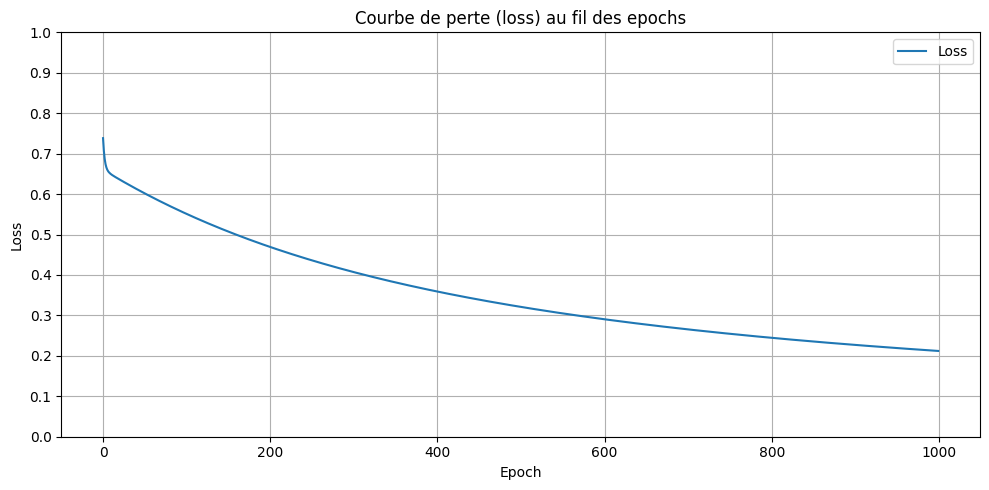

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [85]:
model = pa.MLP([2,1])
model.train(X,Y.reshape(-1,1),1000,0.1,True)
Y_pred = [model.predict(x,True)[0] for x in X]


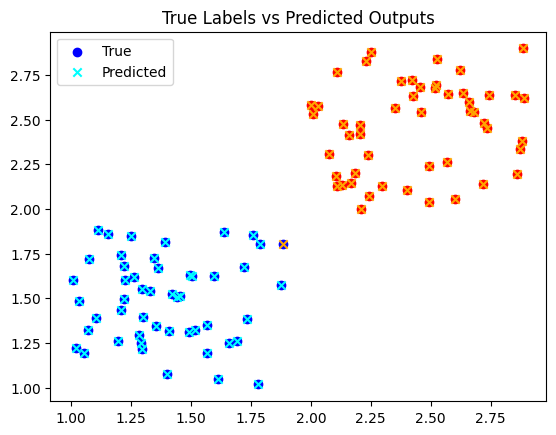

In [86]:
# Plot: Ground Truth
for i, y in enumerate(Y):
    plt.scatter(X[i, 0], X[i, 1], color='blue' if y == 1 else 'red', marker='o', label='True' if i == 0 else "")

# Plot: Predictions
for i, y in enumerate(Y_pred):
    plt.scatter(X[i, 0], X[i, 1], color='cyan' if y > 0 else 'orange', marker='x', label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Outputs")
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [87]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

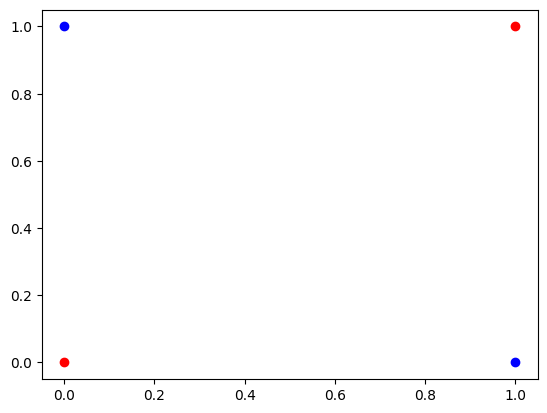

<Figure size 640x480 with 0 Axes>

In [88]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [89]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1)

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Ici ça passe
Accuracy Score : 0.5


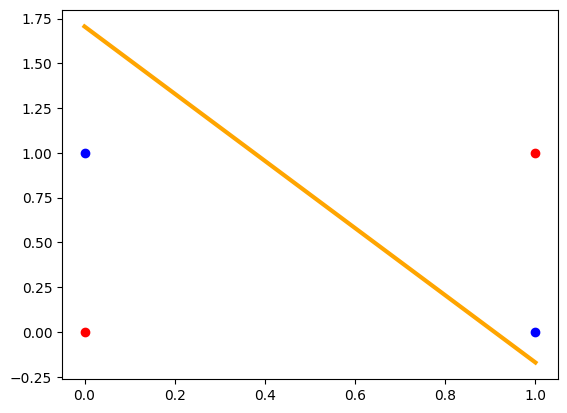

<Figure size 640x480 with 0 Axes>

In [90]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')

x1 = np.linspace(0, 1, 100)
x2 = ( - model.weights[0] * x1 - model.weights[2]) / model.weights[1]

plt.plot(x1, x2, c='orange', lw=3)
plt.show()
plt.clf()

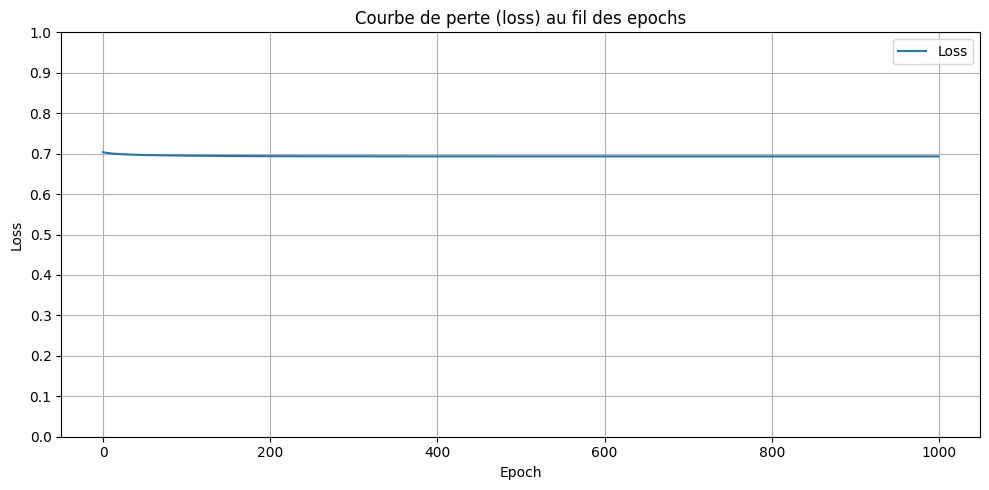

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [92]:
model = pa.MLP([2,2,1])
model.train(X,Y.reshape(-1,1),100000,0.01,True)
Y_pred = [model.predict(x,True)[0] for x in X]

Y_pred

[0.9792517359691172,
 0.9791490563262054,
 -0.973941516095963,
 -0.9725543914424728]

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [93]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

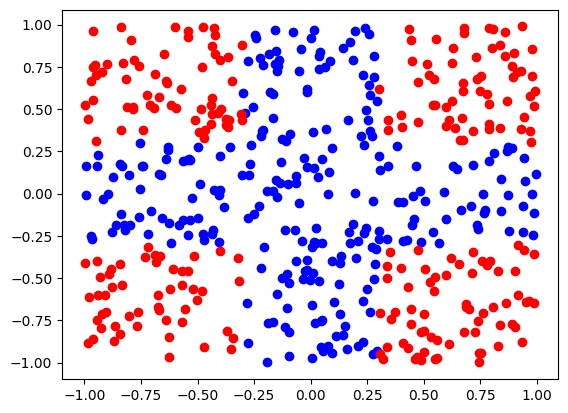

<Figure size 640x480 with 0 Axes>

In [94]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [95]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1)

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Ici ça passe
Accuracy Score : 0.6


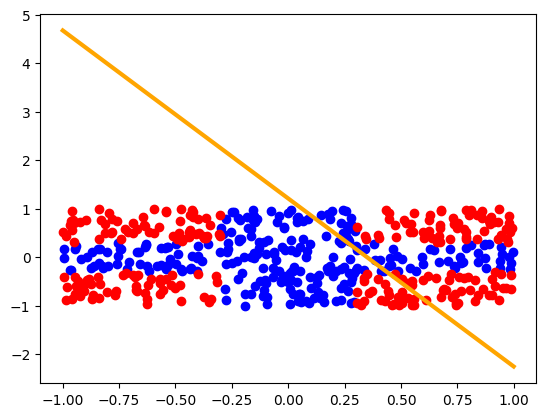

<Figure size 640x480 with 0 Axes>

In [96]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')

x1 = np.linspace(-1, 1, 100)
x2 = ( - model.weights[0] * x1 - model.weights[2]) / model.weights[1]

plt.plot(x1, x2, c='orange', lw=3)
plt.show()
plt.clf()

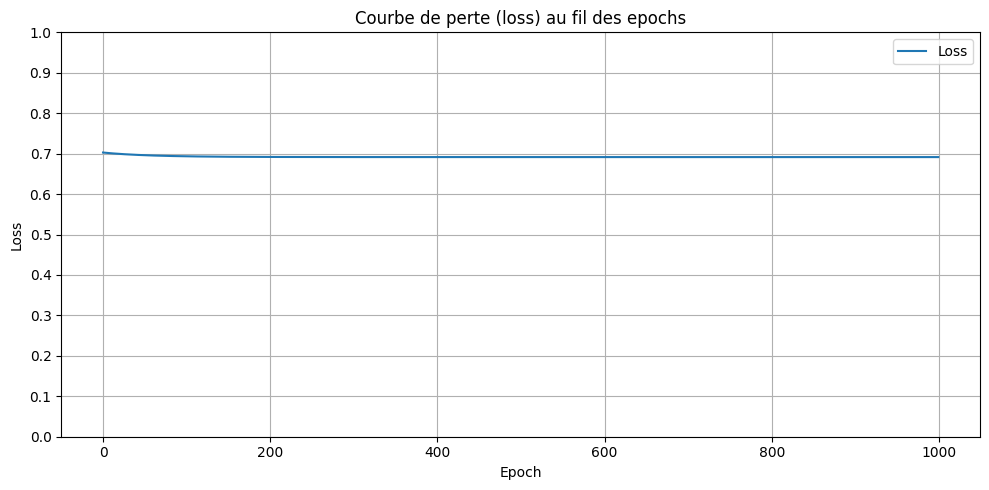

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [98]:
model = pa.MLP([2,4,1])
model.train(X,Y.reshape(-1,1),10000,0.1,True)
Y_pred = [model.predict(x,True)[0] for x in X]


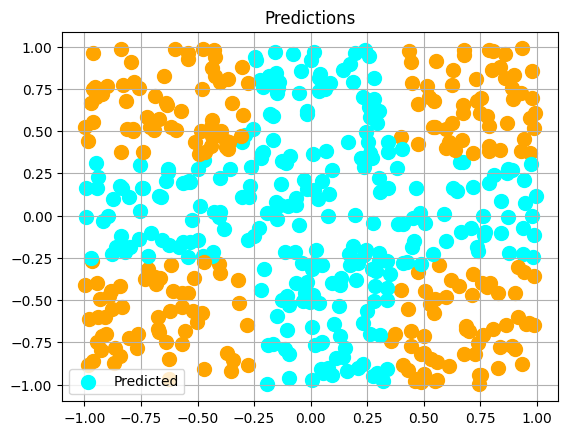

In [99]:
for i, pred in enumerate(Y_pred):
    plt.scatter(X[i, 0], X[i, 1], color='cyan' if pred > 0 else 'orange', s=100, label='Predicted' if i == 0 else "")

plt.legend()
plt.title("Predictions")
plt.grid(True)
plt.show()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [100]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

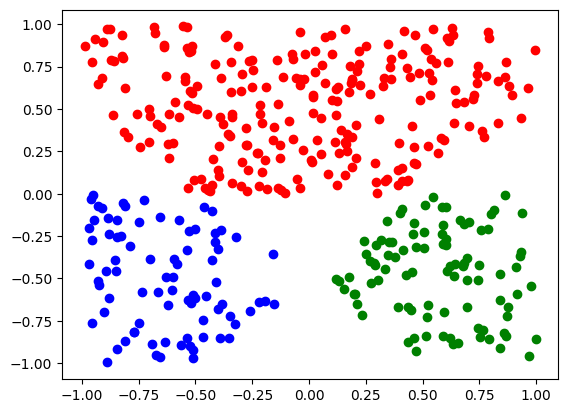

<Figure size 640x480 with 0 Axes>

In [101]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# Linear Model

In [102]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.LinearModel(X, y_i)
    model_i.train_classification(epochs=1000, learning_rate=0.1)
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y = [list(y) for y in Y]     
print(projetannuel.accuracy_score(Y, Y_pred))

Ici ça passe
Ici ça passe
Ici ça passe
0.9806763285024155


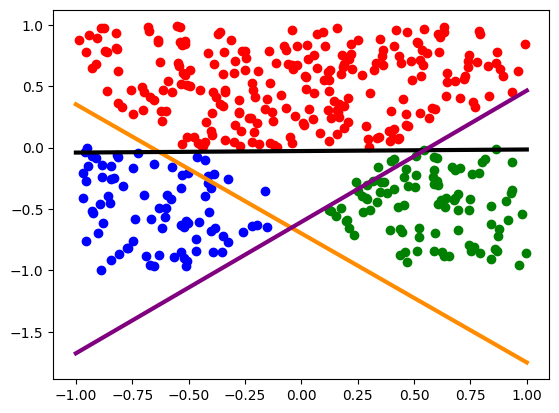

<Figure size 640x480 with 0 Axes>

In [103]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')

colors = ["darkorange", "black", "purple"]
for model in models:
    x1 = np.linspace(-1, 1, 100)
    x2 = ( - model.weights[0] * x1 - model.weights[2]) / model.weights[1]
    plt.plot(x1, x2, c=colors[models.index(model)], lw=3)
plt.show()
plt.clf()

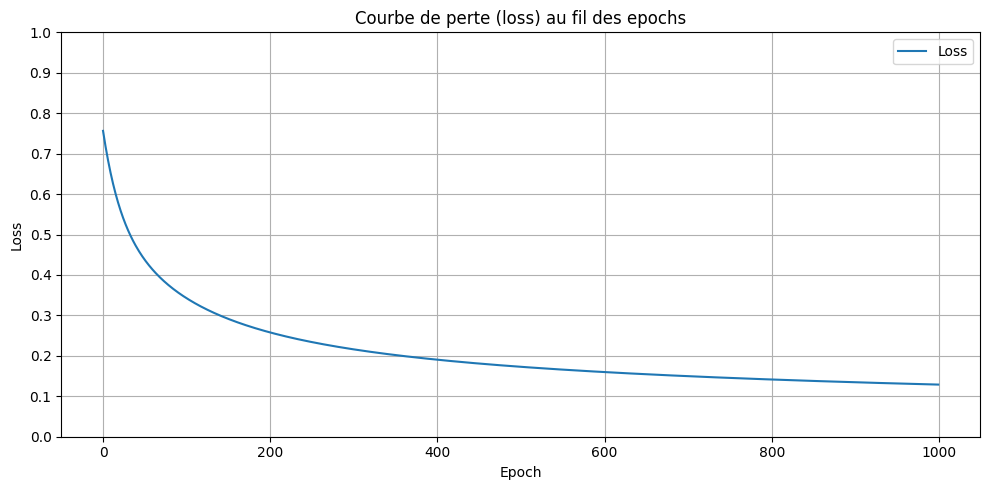

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [105]:
model = pa.MLP([2,3])
model.train(X,Y,1000000,0.01,True)
Y_pred = [model.predict(x,True) for x in X]

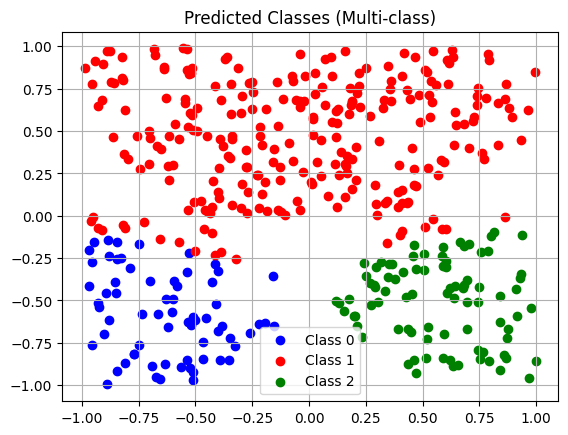

<Figure size 640x480 with 0 Axes>

In [106]:
# Predict class index from Y_pred
predicted_classes = [np.argmax(y) for y in Y_pred]

# Color mapping for classes
colors = ['blue', 'red', 'green']
labels = ['Class 0', 'Class 1', 'Class 2']

# Plot each predicted class in a different color
for class_idx in range(3):
    points = np.array([X[i] for i in range(len(X)) if predicted_classes[i] == class_idx])
    plt.scatter(points[:, 0], points[:, 1], color=colors[class_idx], label=labels[class_idx])

plt.legend()
plt.title("Predicted Classes (Multi-class)")
plt.grid(True)
plt.show()
plt.clf()


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [107]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

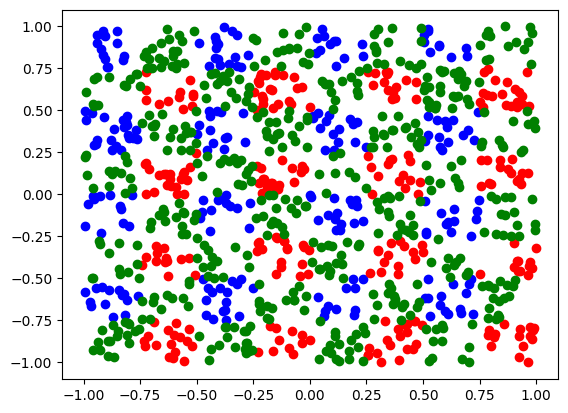

<Figure size 640x480 with 0 Axes>

In [108]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# Linear Model

In [109]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.LinearModel(X, y_i)
    model_i.train_classification(epochs=1000, learning_rate=0.1)
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y = [list(y) for y in Y]     
print(projetannuel.accuracy_score(Y, Y_pred))

Ici ça passe
Ici ça passe
Ici ça passe
0.505


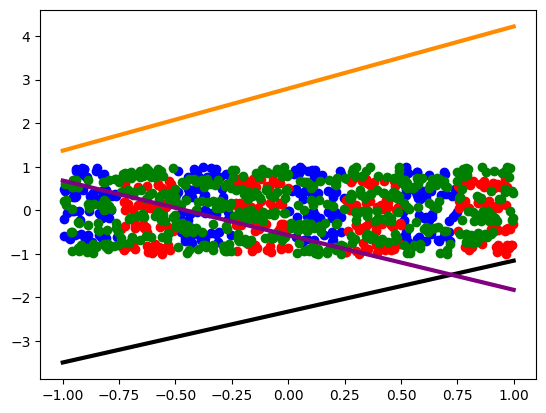

<Figure size 640x480 with 0 Axes>

In [110]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')

colors = ["darkorange", "black", "purple"]
for model in models:
    x1 = np.linspace(-1, 1, 100)
    x2 = ( - model.weights[0] * x1 - model.weights[2]) / model.weights[1]
    plt.plot(x1, x2, c=colors[models.index(model)], lw=3)
plt.show()
plt.clf()

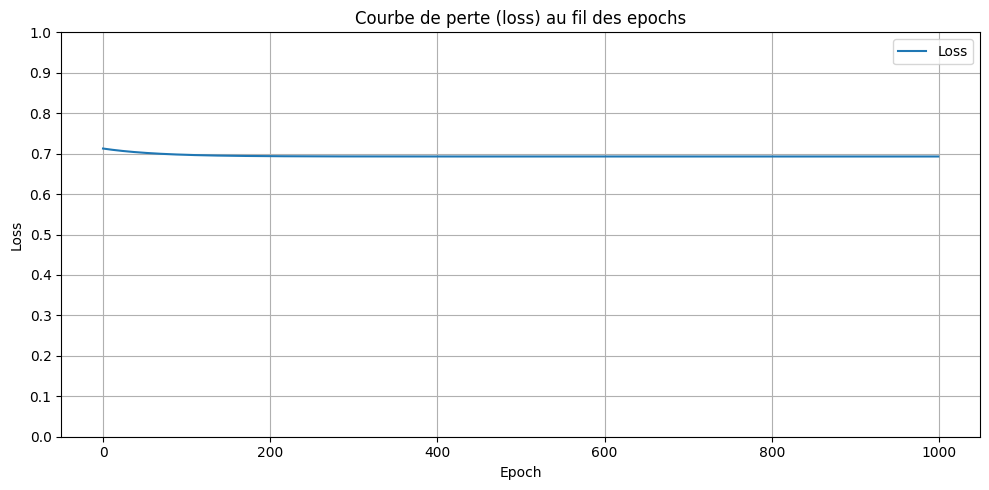

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [112]:
param_grid = {
    "hidden_layer_1": [4, 8, 16, 32],
    "hidden_layer_2": [4, 8, 16, 32],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000, 100000],
}

In [113]:
# import itertools

# best_score = 0.0
# best_params = None

# for h1, h2, lr, ep in itertools.product(
#     param_grid["hidden_layer_1"],
#     param_grid["hidden_layer_2"],
#     param_grid["learning_rate"],
#     param_grid["epochs"]
# ):
#     model = pa.MLP([2, h1, h2, 3])
#     model.train(X, Y, ep, lr, True)
#     Y_pred = [model.predict(x, True) for x in X]
#     Y_pred = np.argmax(Y_pred, axis=1).tolist()
#     Y_train = np.argmax(Y, axis=1).tolist()
#     acc = pa.accuracy_score(Y_train, Y_pred)
    
#     print(f"Tested: h1={h1}, h2={h2}, lr={lr}, epochs={ep}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (h1, h2, lr, ep)

In [114]:
#meilleur modele de la grille
model = pa.MLP([2, 16, 16, 3])
model.train(X,Y,100000,0.05,True)
Y_pred =[model.predict(x,True) for x in X]

In [115]:
Y = [list(y) for y in Y]     
print(pa.accuracy_score(Y, Y_pred))

0.515


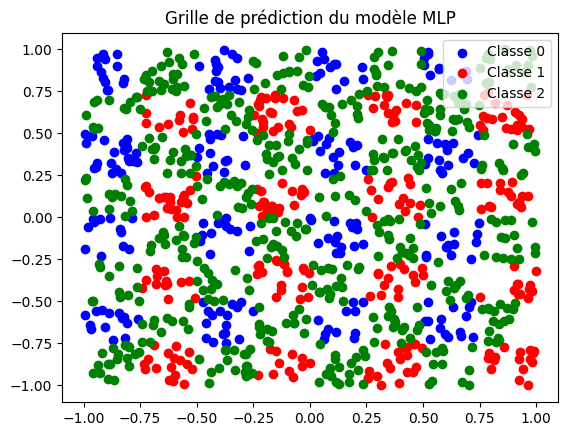

In [116]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = min([x[0] for x in X]) - 1, max([x[0] for x in X]) + 1
y_min, y_max = min([x[1] for x in X]) - 1, max([x[1] for x in X]) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([np.argmax(model.predict(p.tolist(), True)) for p in grid_points])
Z = Z.reshape(xx.shape)


colors = ['blue', 'red', 'green']
for i in range(3):
    class_points = np.array([x for j, x in enumerate(X) if Y[j][i] == 1])
    if len(class_points) > 0:
        plt.scatter(class_points[:, 0], class_points[:, 1], color=colors[i], label=f"Classe {i}")

plt.title("Grille de prédiction du modèle MLP")
plt.legend()
plt.show()


## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [117]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

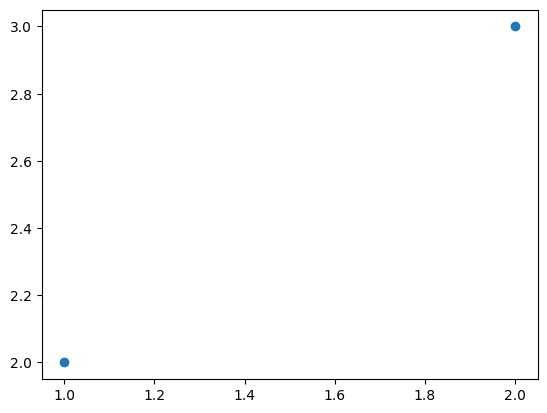

<Figure size 640x480 with 0 Axes>

In [118]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# Linear Model

In [119]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.9721522630525295e-30
RMSE : 1.4043333874306805e-15


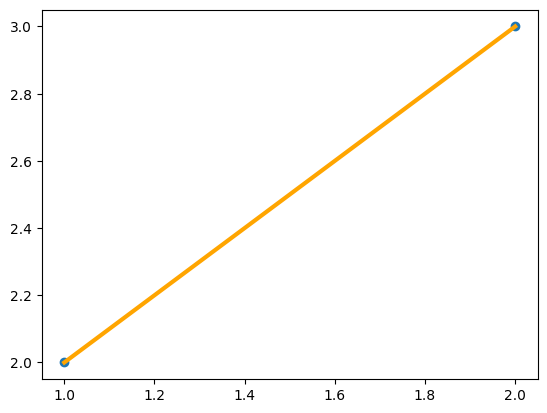

<Figure size 640x480 with 0 Axes>

In [120]:
plt.scatter(X, Y)

x1 = np.linspace(min(X), max(X), 100)
x2 = model.weights[0] * x1 + model.weights[1]

plt.plot(x1, x2, c='orange', lw=3)
plt.show()
plt.clf()


# MLP

In [121]:
modele = pa.MLP([1,1])
modele.train(X,Y.reshape(-1,1),1000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 3.729807476854136e-09
RMSE : 6.107214976447231e-05


### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [122]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

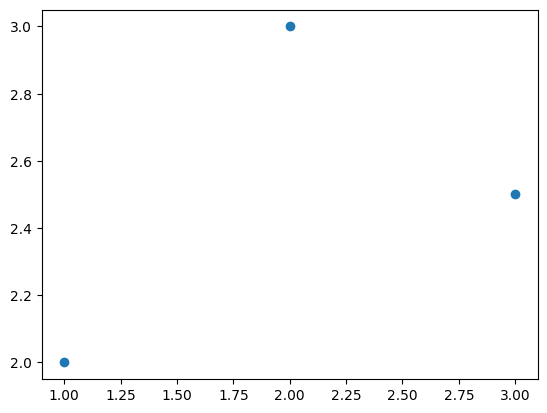

<Figure size 640x480 with 0 Axes>

In [123]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# Linear Model

In [124]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.12500000000000008
RMSE : 0.3535533905932739


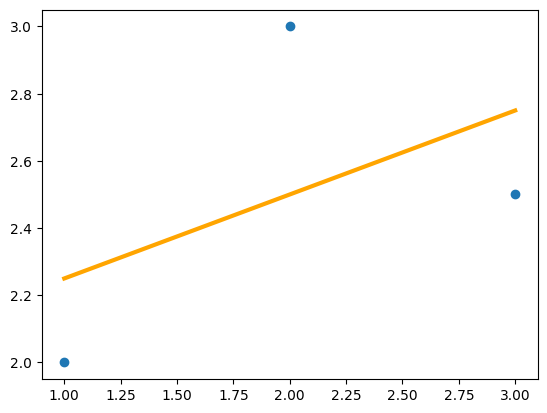

<Figure size 640x480 with 0 Axes>

In [125]:
plt.scatter(X, Y)

x1 = np.linspace(min(X), max(X), 100)
x2 = model.weights[0] * x1 + model.weights[1]

plt.plot(x1, x2, c='orange', lw=3)
plt.show()
plt.clf()

# MLP

In [126]:
modele = pa.MLP([1,3,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.0958926788528579e-16
RMSE : 1.0468489283811957e-08


### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [127]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

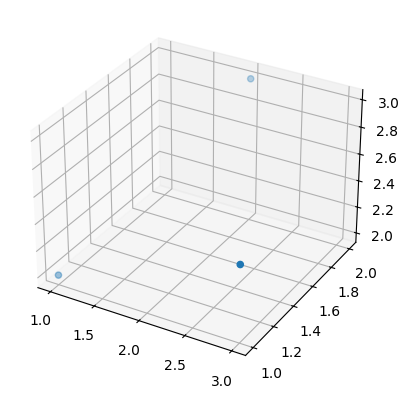

<Figure size 640x480 with 0 Axes>

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Linear Model

In [129]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 4.2729965699471475e-30
RMSE : 2.0671227757313177e-15


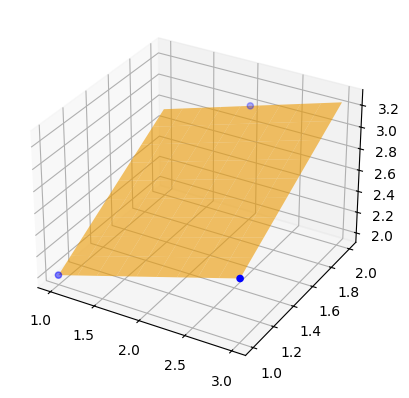

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1, x2)

w0 = model.weights[0]
w1 = model.weights[1]
b  = model.weights[2]
y_pred_grid = w0 * x1_grid + w1 * x2_grid + b

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6, label='Régression')
plt.show()

# MLP

In [131]:
modele = pa.MLP([2,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 5.9164567891575885e-31
RMSE : 7.691850745534255e-16


### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [132]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

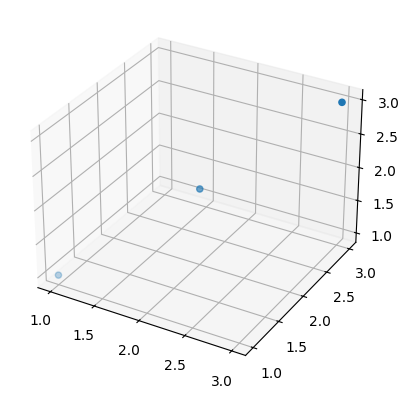

<Figure size 640x480 with 0 Axes>

In [133]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Linear Model

In [134]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 5.482994156340834e-29
RMSE : 7.404724273287179e-15


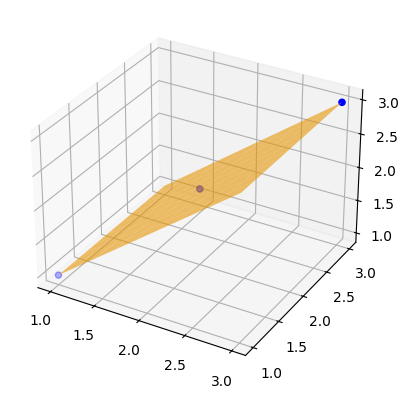

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1, x2)

w0 = model.weights[0]
w1 = model.weights[1]
b  = model.weights[2]
y_pred_grid = w0 * x1_grid + w1 * x2_grid + b

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6, label='Régression')
plt.show()

# MLP

In [136]:
modele = pa.MLP([2,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.0
RMSE : 0.0


### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [137]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

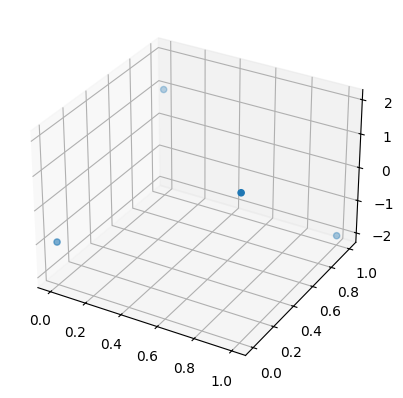

<Figure size 640x480 with 0 Axes>

In [138]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Linear Model

In [139]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 2.25
RMSE : 1.5


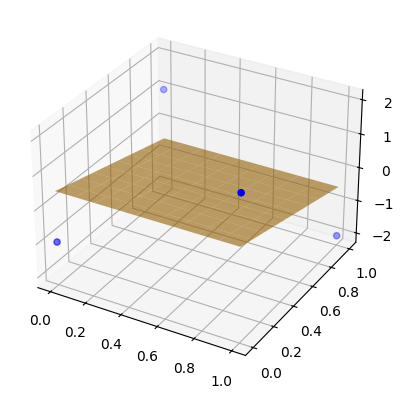

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1, x2)

w0 = model.weights[0]
w1 = model.weights[1]
b  = model.weights[2]
y_pred_grid = w0 * x1_grid + w1 * x2_grid + b

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6, label='Régression')
plt.show()

# MLP

In [141]:
modele = pa.MLP([2,2,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.2629217755093733
RMSE : 1.1237979246774632
